In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
salesDF = pd.read_excel("./sales all division.xlsx")


In [3]:
salesDF.head()

,Brand,Model_Year,Body_Model,Trim_Level,CPOS,VIN,Dealer_Delivery_Date,Ship_To,Sold_Date,Sold_By,Dealer_Name,Days_To_Sell,Business_Center,State,DMA,District,Configuration,Sales_Code,Paint_Code,EngineCode
0,RAM Division,2013,RAM HD CREW,3500 LA IE CREW CAB 4X4,D28P91 28H,3C63R3EL6DG597557,06/25/2013,44311,07/29/2013,44311,KERNERSVILLE CHRYSLER DODGE JEEP 44311,34.0,SOUTHEAST,NC,Greensboro-High Point-Winst,CHARLOTTE,"*GJ,-X9,CLF,DF2,GX4,LNC,MRT,RA4,XBM,XMF",*GJ - Leather Trimmed Bucket Seats; -X9 - Blac...,PW7 - Bright White Clear Coat,ETK - 6.7L I6 Cummins Turbo Diesel Engine
1,RAM Division,2013,RAM HD CREW,3500 LONGHORN CREW CAB 4X4,D28R92 28K,3C63RRKL5DG608829,08/17/2013,43289,2013-09-09 00:00:00,43289,DOUGLAS DODGE 43289,23.0,MIDWEST,IL,Champaign & Springfield-Dec,CENTRAL ILLINOIS,"*XJ,-U1,ADB,ADC,ADE,AHD,AHU,DF2,DME,GFA,GWA,GX...",*XJ - Cloth Low-back Bucket Seats; -U1 - Canyo...,PEP - Deep Auburn Pearl Coat,ETK - 6.7L I6 Cummins Turbo Diesel Engine
2,RAM Division,2013,RAM HD MEGA,3500 SLT MEGA CAB 4X4,D28H81 2FG,3C63RRLL4DG583209,06/14/2013,60407,2013-02-12 00:00:00,64409,BOLTON CHRYSLER DODGE JEEP 64409,171.0,DENVER,KS,Topeka,KANSAS/CO,"*MJ,-X8,ADA,ADB,ADE,AHD,CLF,DG7,DME,LNJ,MRT,RA...",*MJ - Premium Cloth Bucket Seats; -X8 - Black/...,PDM - Mineral Gray Met. Clear Coat,ETK - 6.7L I6 Cummins Turbo Diesel Engine
3,Dodge Division,2014,CHALLENGER,R/T,LCDP22 27M,2C3CDYBT5EH183958,12/20/2013,26799,12/31/2013,26799,WATSON BENZIE LLC 26799,11.0,GREAT LAKES,MI,Traverse City-Cadillac,TRAVERSE CITY,"*EJ,-DV,ACX,ATL,DEC,RHR,WHD",*EJ - Leather Trimmed Bucket Seats; -DV - Dark...,PL4 - Header Orange Clear Coat,EZC - 5.7L V8 HEMI VVT Engine
4,Fiat Division,2013,500 HATCHBACK,500 POP HATCHBACK,FFFL24 22A,3C3CFFAR0DT754024,2013-06-11 00:00:00,69210,2013-04-12 00:00:00,69210,CLAY COOLEY FIAT 69210,28.0,SOUTHWEST,TX,Dallas-Fort Worth,SWBC FIAT North,"*AJ,-X9,CXR,DF1,WJC",*AJ - Cloth Bucket Seats; -X9 - Black; CXR - R...,PS2 - Bright Silver Metallic Clear Coat,EAB - 1.4L I4 MultiAir 16V Engine


In [4]:
pd.isnull(salesDF).sum().sort_values(ascending=False)

Days_To_Sell            5
EngineCode              0
Sold_Date               0
Model_Year              0
Body_Model              0
Trim_Level              0
CPOS                    0
VIN                     0
Dealer_Delivery_Date    0
Ship_To                 0
Sold_By                 0
Paint_Code              0
Dealer_Name             0
Business_Center         0
State                   0
DMA                     0
District                0
Configuration           0
Sales_Code              0
Brand                   0
dtype: int64

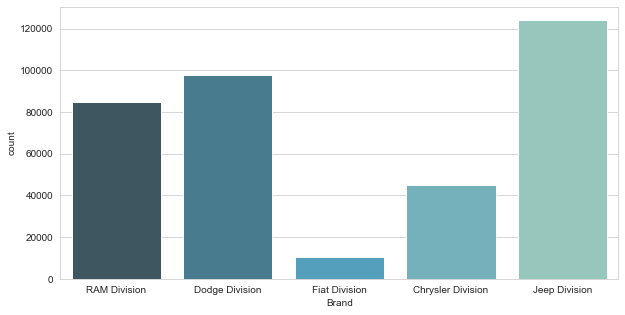

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Brand', data=salesDF,palette= 'GnBu_d')

In [ ]:
df.

In [7]:
salesDF['Sold_Date'] = pd.to_datetime(salesDF['Sold_Date'])

In [8]:
salesDF = salesDF.sort_values(['Sold_Date'], ascending=True)

Text(0, 0.5, 'Count of Cares sold')

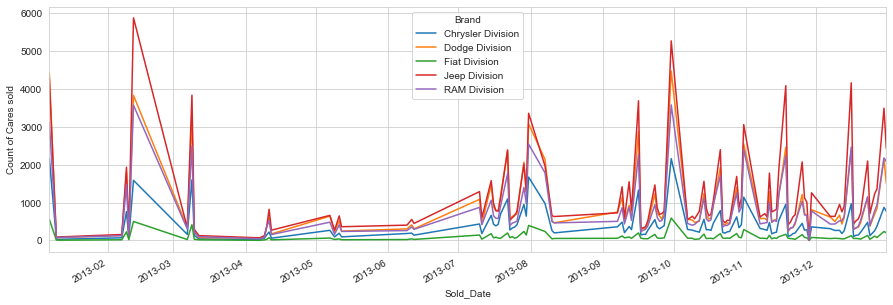

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
salesDF.groupby(['Sold_Date', 'Brand']).count()['VIN'].unstack().plot(ax=ax)
plt.ylabel("Count of Cares sold")

Text(0, 0.5, 'Days to Sell')

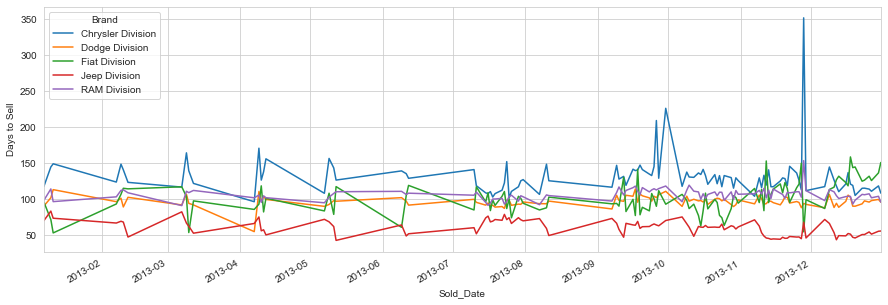

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
salesDF.groupby(['Sold_Date', 'Brand']).mean()['Days_To_Sell'].unstack().plot(ax=ax)
plt.ylabel("Days to Sell")

In [13]:
chrysler_sales_df = salesDF[salesDF['Brand']=='Chrysler Division']

In [14]:
chrysler_sales_df = chrysler_sales_df.drop(['Paint_Code','Configuration'], axis=1)

In [15]:
#chrysler_sales_df['Sold_Date'] = pd.to_datetime(chrysler_sales_df['Sold_Date'])


In [16]:
chrysler_sales_df['Sold_Month'] = chrysler_sales_df['Sold_Date'].apply(lambda x : x.month)

Text(0, 0.5, 'Count of Cars sold')

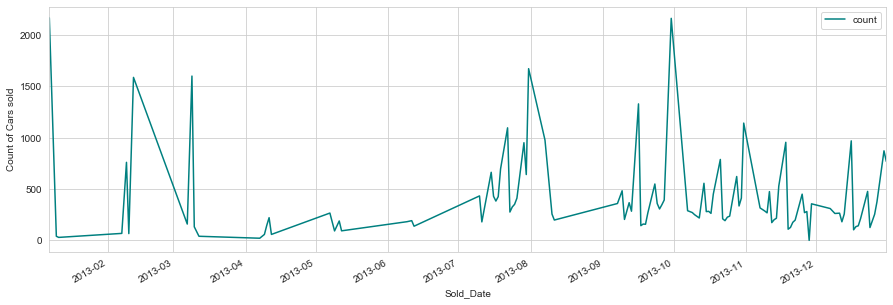

In [17]:
chrysler_sales_df.groupby(by=['Sold_Date']) ['VIN'].agg(['count']).plot(figsize=(15,5), color='teal')
plt.ylabel("Count of Cars sold")

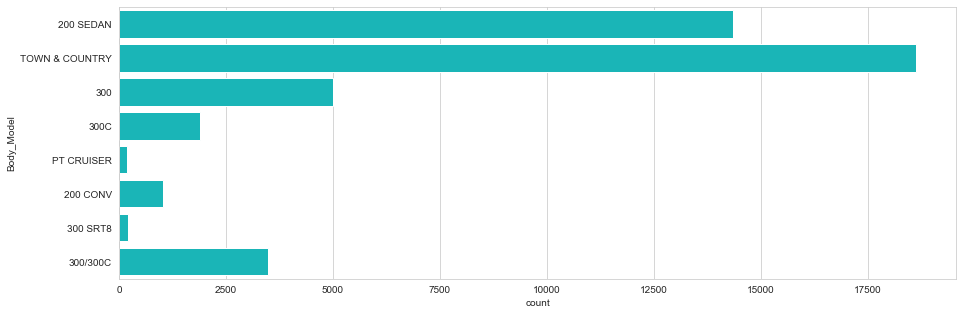

In [62]:
#Which body model is highest selling
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.countplot(y='Body_Model', data=chrysler_sales_df, color='darkturquoise')

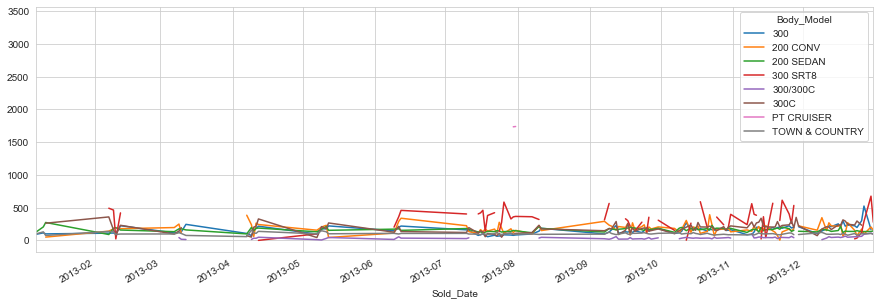

In [63]:
fig1, ax1 = plt.subplots(figsize=(15,5))
chrysler_sales_df.groupby(['Sold_Date', 'Body_Model']).mean()['Days_To_Sell'].unstack().plot(ax=ax1)



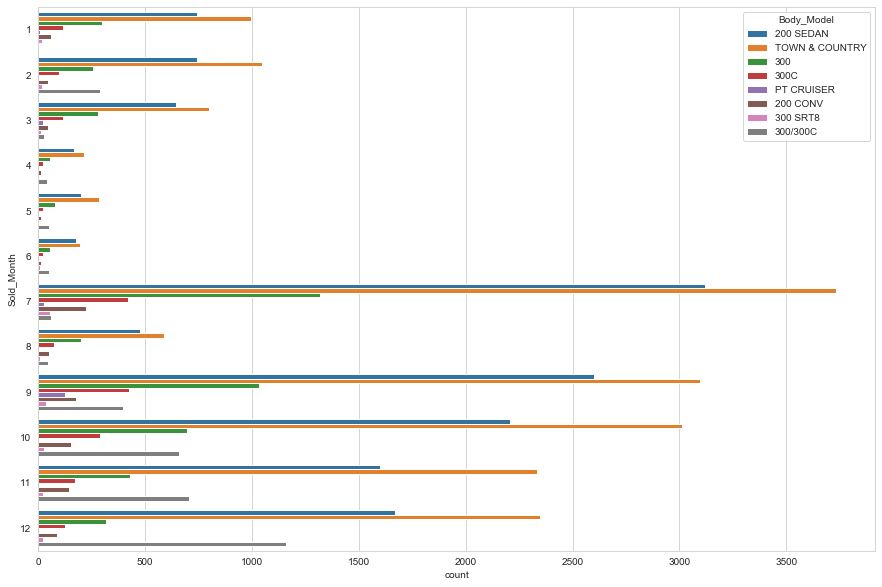

In [64]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.countplot(y='Sold_Month', hue='Body_Model',data=chrysler_sales_df)



Text(0, 0.5, 'Average Days to Sell')

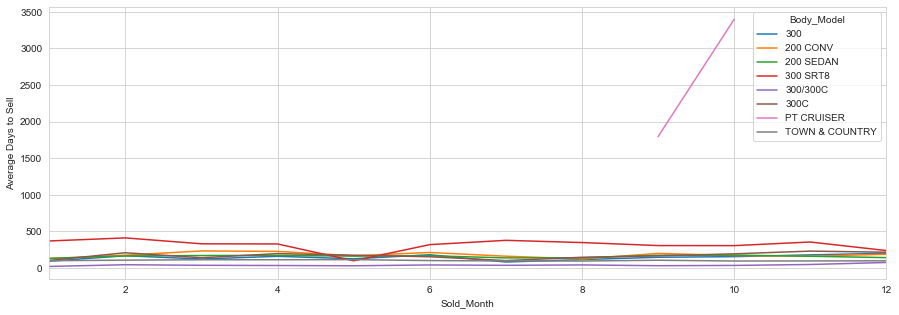

In [18]:
fig1, ax1 = plt.subplots(figsize=(15,5))
chrysler_sales_df.groupby(['Sold_Month', 'Body_Model']).mean()['Days_To_Sell'].unstack().plot(ax=ax1)
plt.ylabel("Average Days to Sell")

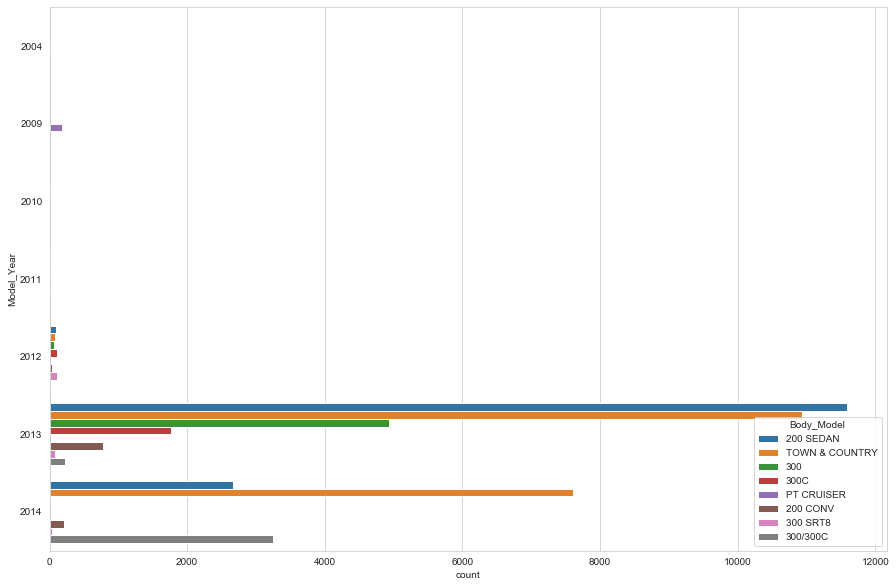

In [66]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.countplot(y='Model_Year', hue='Body_Model',data=chrysler_sales_df)

<b>IPBA - Batch 11, April 2020</b> <br>
<b>Team members:</b><br>
Anjan Singha<br>
Krishnamoorthy Srinivasan<br>
Sabyasachi Das<br>
Shagun Sood<br>
Varun Kuzhikattil<br>
Yash Mangla<br>